In [1]:
import tensorflow as tf
import numpy as np

# toy dataset
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt 

full_conn = tf.contrib.layers.fully_connected

distributions = tf.contrib.distributions

tf.app.flags.DEFINE_integer("latent_dims", 2, "Latent dimensions.")
tf.app.flags.DEFINE_integer("hidden_size", 10,
                          "Hidden size of fully connected layer.")
tf.app.flags.DEFINE_integer("batch_size", 64,
                          "Minibatch size.")

FLAGS = tf.app.flags.FLAGS

In [3]:
def inference_net(x, latent_dim, hidden_size):
    with tf.variable_scope('inference_network'):
        net = full_conn(x, hidden_size)
        gaussian_param = full_conn(net, latent_dim * 2, activation_fn=None)
        mu = gaussian_param(:, :latent_dim)
        sigma = gaussian_param(:, latent_dim:)
    return mu, sigma

def generative_net(z, hidden_size):
    with tf.variable_scope('generative_network'):
        net = full_conn(z, hidden_size)
        gaussian_param = full_conn(net, 64 * 2, activation_fn=None)
        mu = gaussian_param(:, :64)
        sigma = gaussian_param(:, 64:)
    return bernoulli_logits

def model():
    with tf.variable_scope('model', reuse=True):
        with tf.variable_scope('inference'):
            x = tf.placeholder(tf.float32, [None, 64])
            mu, sigma = inference_net(x, FLAGS.latent_dim, FLAGS.hidden_size)
        q_z_given_x = distributions.Normal(loc=mu, scale=sigma)
        mu_l, sigma_l = generative_net(q_z_given_x.sample(), FLAGS.latent_dim, FLAGS.hidden_size)
        p_x_given_z = distributions.Normal(loc=mu_l, scale=sigma_l)
        p_x_given_z_samples = p_x_given_z.sample()
     return x, p_x_given_z_samples

In [4]:
def train():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-4-2d66facce087>, line 1)

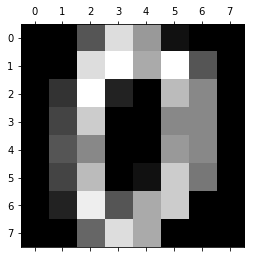

SystemExit: 

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
def main(_):
    # http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits
    (_data, _target) = load_digits(n_class = 2, return_X_y = True)
    
    image = np.split(_data[0], 8)
    plt.gray() 
    plt.matshow(image) 
    plt.show() 
    
    exit


if __name__ == '__main__':
    tf.app.run()